# Assignment 2

## Lennard Rose 5122737

## Convolutional neural network

Develop the complete training and evaluation pipeline for a convolutional neural network model.
This shall cover all the stages discussed in the course, starting from data preparation and finishing with model evaluation.
You can (you should) use the full functionality of PyTorch and all its packages.

You can write most of your code as standard python scripts and packages outside jupyter notebook.
The calls to the functionality shall, however, be executed from this notebook (not command-line).
All printouts and images should also be displayed in this notebook.

### Model training and evaluation

Define the function `cnn_train` for training and evaluating a CNN model for classification of **FashionMNIST** data.
The function shall be flexible so that it can take in the parameters listed in the code cell bellow. We will test it with various values!

The architecture of the CNN shall be composed of blocks, where each block contains 
* a convolutional layer with 3x3 kernel without any downsampling
* nonlinearity (your choice)
* 2x2 maxpooling layer with stride 2

The number of output channels in these blocks shall be flexible to be set by the user within `out_channels`.
The network shall finish by 2 fully connected layers to produce the outputs (you will need to automate the sizing of these so that it can continue from arbitrary setting of the blocks that preceed it).

All other decisions related to the complete train and test pipeline you need to do on your own.

The `cnn_train` function shall return 
* the trained model `cnn_model`
* train and test losses in a 2-long tuple `(train_losses, test_losses)`, where train and test losses are simple python lists
* anything else you deem important or useful (this is for you really, in case you want to re-use the function later etc.)

Furthermore, the function shall be able to produce monitoring plots of train and test losses and train and test accuracies.
There is no pre-defined design for the plots.
However, you shall annotate the graphs so that they are well readable and understandable.

##### As mentioned in the last Assignment, most of the training logic is reused in this assignment, so further information can be found in the last assignment. As the mlp_train function before, the cnn_train method only coordinates the steps on the highest abstraction level (initializing the cnn, training the cnn, plotting/return the result). The initialization-step is also similar as with the MLP, not implementing a custom nn.Module but building the cnn as with nn.Sequential (see init_cnn(...) function). Training and plotting steps are handled similar to the last assignment.

Using cpu for training


C:\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1 / 10
Training Loss: 1.933 - Accuracy: 41.1%
Validation Loss: 1.113 - Accuracy: 63.06%
Epoch 2 / 10
Training Loss: 0.866 - Accuracy: 68.78%
Validation Loss: 0.77 - Accuracy: 71.55%
Epoch 3 / 10
Training Loss: 0.711 - Accuracy: 74.12%
Validation Loss: 0.775 - Accuracy: 70.8%
Epoch 4 / 10
Training Loss: 0.66 - Accuracy: 75.98%
Validation Loss: 0.648 - Accuracy: 75.79%
Epoch 5 / 10
Training Loss: 0.63 - Accuracy: 77.17%
Validation Loss: 0.625 - Accuracy: 77.34%
Epoch 6 / 10
Training Loss: 0.606 - Accuracy: 77.78%
Validation Loss: 0.654 - Accuracy: 74.06%
Epoch 7 / 10
Training Loss: 0.585 - Accuracy: 78.66%
Validation Loss: 0.608 - Accuracy: 77.22%
Epoch 8 / 10
Training Loss: 0.567 - Accuracy: 79.19%
Validation Loss: 0.614 - Accuracy: 76.78%
Epoch 9 / 10
Training Loss: 0.553 - Accuracy: 79.93%
Validation Loss: 0.657 - Accuracy: 74.71%
Epoch 10 / 10
Training Loss: 0.539 - Accuracy: 80.53%
Validation Loss: 0.626 - Accuracy: 76.73%


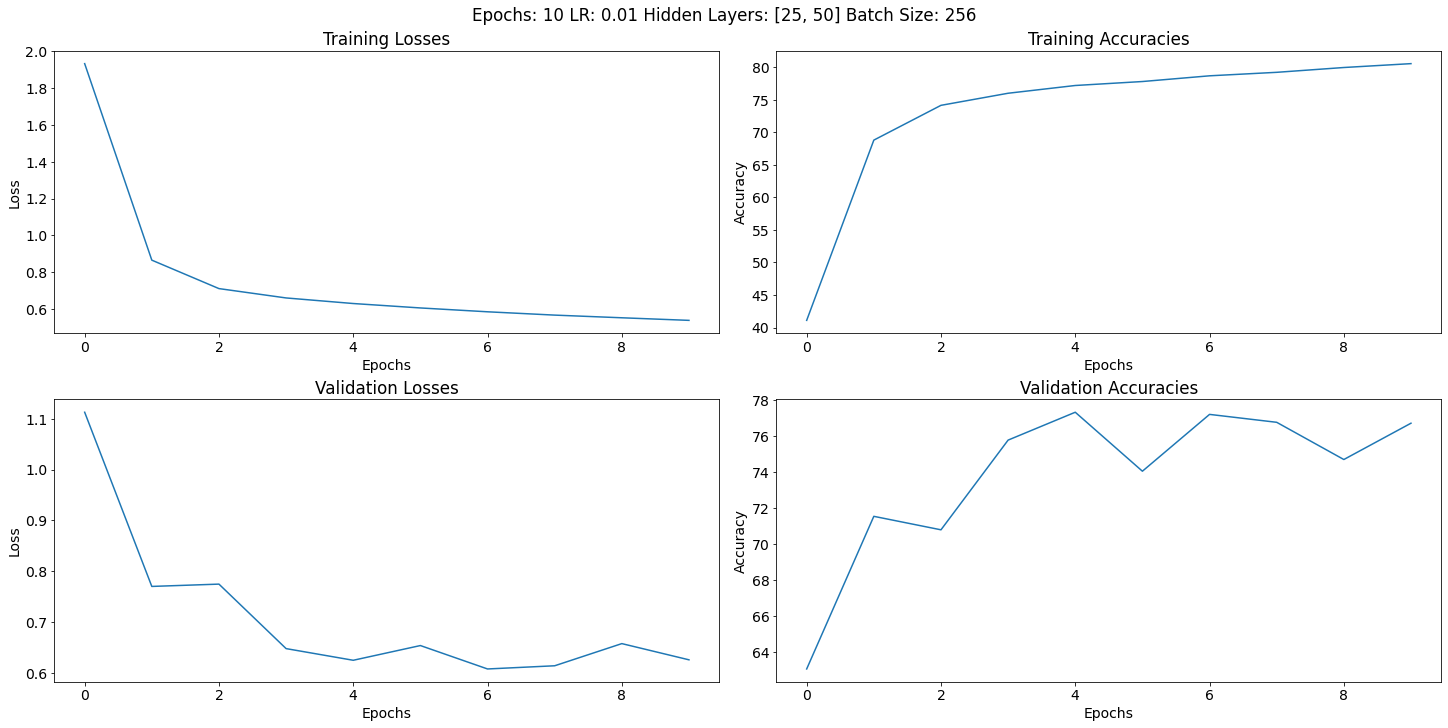

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(25, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Flatten(start_dim=1, end_dim=-1)
  (3): Linear(in_features=2450, out_features=100, bias=True)
  (4): Linear(in_features=100, out_features=10, bias=True)
)


In [10]:
# define function cnn_train so that it can be run from this cell
from cnn import cnn_train

# user paramters
out_channels = [25, 50]  # list of number of output channels to be used in the cnn blocks
epochs = 10  # number of epochs
batch_size = 256  # training batch size
learning_rate = 0.01  # learning rate
cuda = False  # true or false to train the model on cuda or not
plots = True  # true or false to produce plots of train and test losses and accuracies

# train and evaluate mlp_model
cnn_model, losses, accuracies = cnn_train(out_channels, epochs, batch_size, learning_rate, cuda, plots, verbose=True)
print(cnn_model)

### Model application

Define a simple utility function `cnn_apply` that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

##### The cnn_apply function is similar to the mlp_apply function from the last assignment. Only one additional step was necessary to make the test data match the right dimensions. The predictions here are the exact same as in the mlp assignment. More epochs might be necessary because of the more complex model. The "bumps" in the loss-graphs in the cell above might indicate some issues with the (arbitrarily) chosen learning rate.
##### Not True for this run, can only convert to html in jupyter but it clears all outputs, ran it again in pycharm here. Now its only 70% and not so bumpy but still the sweatshirts and the shoes.

Accuracy 70.0% on Test Samples: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] (count: 10)


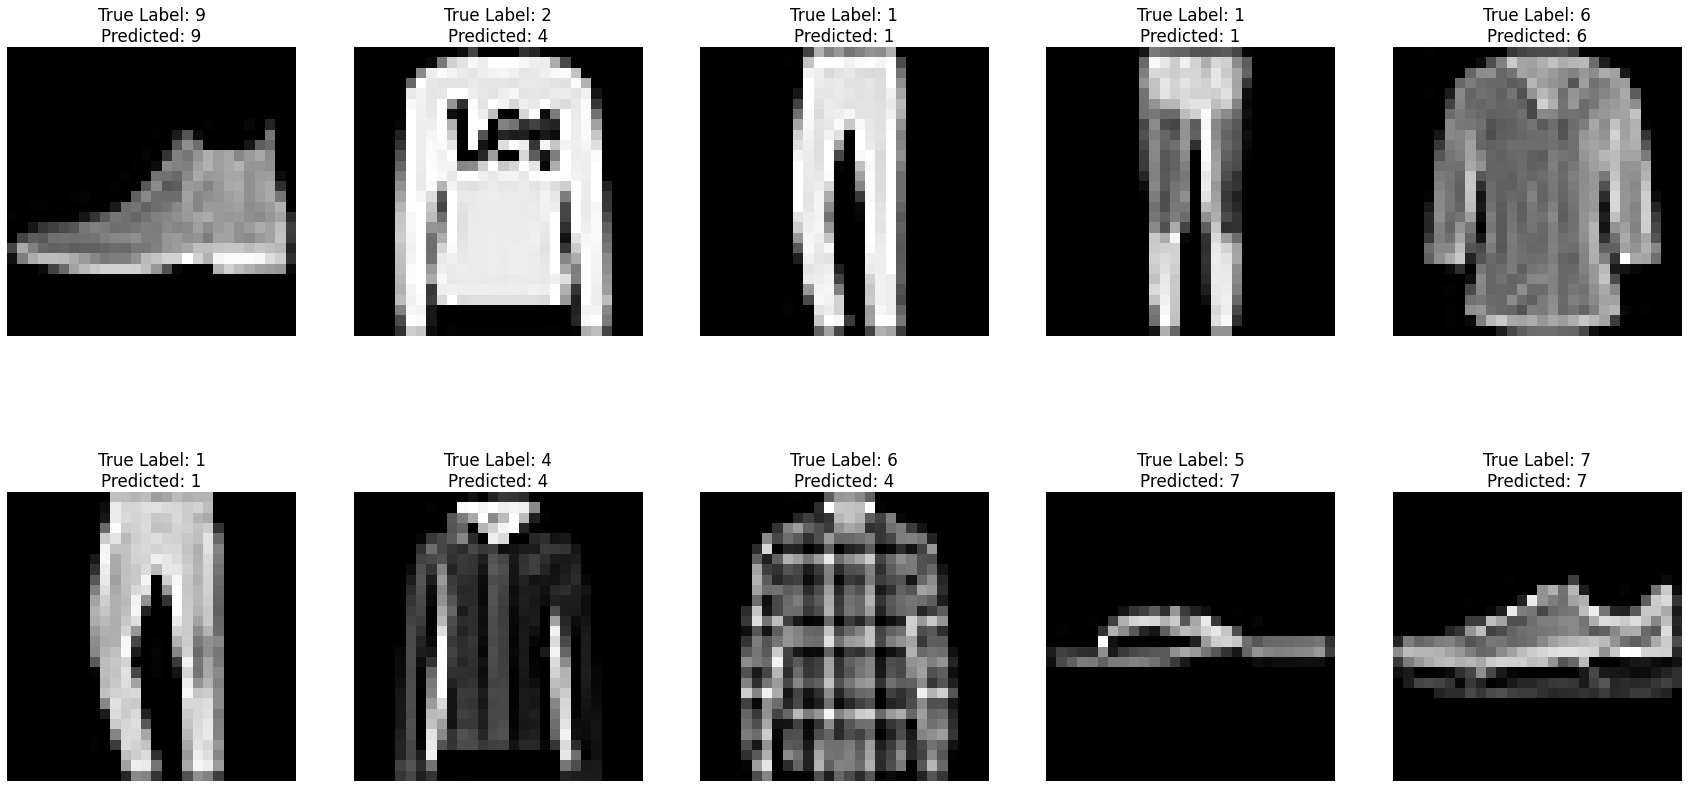

In [11]:
# define function mlp_train so that it can be run from this cell
from cnn import cnn_apply

# user parameters
test_indexes = [i for i in range(10)]  # list of 10 indexes - examples to extract from test set

cnn_apply(cnn_model, test_indexes)

### Train and apply model

Use your functions defined above to train the cnn model. Try different values of the hyper-paramter (user parameters) settings. You shall achieve better test accuracy than in the mlp model from Part 1.

Produce the results (plots etc.) here and comment shortly on the results and the hyper-parameters you tested.

##### For the test with different hyperparameter, I used values from a wide range. First tries with out_channel values of [400, 200] and [256, 128, 64] resulted in exceedingly long training times. So I used the values below to see if more feature maps are necessarily better than fewer, and if deeper nets are better than less with more generated feature maps. The number of epochs is again very low because of the amount of time I can spend on training.

In [ ]:
from cnn import cnn_train
import pandas as pd
learning_rates = [0.001, 0.01, 0.1]
epochs = [5, 10, 20]
batch_sizes = [64, 128]
out_channelels = [[64, 32],[16, 8],[8, 8, 8, 8]]
cuda = False
plots = False
verbose = False

results = []

for learning_rate in learning_rates:
    for epoch in epochs:
        for batch_size in batch_sizes:
            for out_channels in out_channelels:
                _, losses, accuracies = cnn_train(out_channels=out_channels,
                                                                            epochs=epoch,
                                                                            batch_size=batch_size,
                                                                            learning_rate= learning_rate,
                                                                            cuda=cuda,
                                                                            plot=plots,
                                                                            verbose=verbose)
                results.append([out_channels, epoch, batch_size, learning_rate,
                                losses[0][-1], losses[1][-1], accuracies[0][-1], accuracies[1][-1]])

resultframe = pd.DataFrame(results, columns=["out_channels", "Epoch", "Batch Size", "Learning Rate",
                                             "Training Loss", "Test Loss", "Training Accuracy","Test Accuracy"])

In [ ]:
# save result in case something goes wrong
resultframe.to_excel("cnn_results.xlsx")

In [3]:
import pandas as pd
resultframe = pd.read_excel("cnn_results.xlsx")

In [4]:
resultframe

,out_channels,Epoch,Batch Size,Learning Rate,Training Loss,Test Loss,Training Accuracy,Test Accuracy
0,"[64, 32]",5,64,0.001,0.732431,0.729357,7.409833e+01,73.80
1,"[64, 32]",5,128,0.001,0.955020,0.908581,6.609167e+01,66.31
2,"[64, 32]",10,64,0.001,0.609094,0.620969,7.830333e+01,77.69
3,"[64, 32]",10,128,0.001,0.705559,0.709044,7.564167e+01,75.11
4,"[64, 32]",20,64,0.001,0.517717,0.545304,8.161333e+01,80.44
5,"[64, 32]",20,128,0.001,0.593567,0.611260,7.886667e+01,78.14
6,"[64, 32]",5,64,0.010,0.471702,0.492395,8.301667e+01,81.77
7,"[64, 32]",5,128,0.010,0.551382,0.579039,7.986167e+01,77.01
8,"[64, 32]",10,64,0.010,0.367546,0.394770,8.697833e+01,85.55
9,"[64, 32]",10,128,0.010,0.447857,0.463437,8.386000e+01,83.53


In [5]:
top_10 = resultframe.sort_values(by="Test Accuracy", ascending=False).head(10)
top_10

,out_channels,Epoch,Batch Size,Learning Rate,Training Loss,Test Loss,Training Accuracy,Test Accuracy
16,"[64, 32]",20,64,0.10,0.161868,0.269542,9.416000e+01,91.27
17,"[64, 32]",20,128,0.10,0.187100,0.255230,9.320000e+01,90.79
14,"[64, 32]",10,64,0.10,0.210052,0.270091,9.236000e+01,90.46
34,"[16, 8]",20,64,0.10,0.241735,0.293689,9.111667e+01,89.96
12,"[64, 32]",5,64,0.10,0.267723,0.293329,9.040833e+09,89.43
35,"[16, 8]",20,128,0.10,0.260104,0.325157,9.058333e+01,88.70
10,"[64, 32]",20,64,0.01,0.292368,0.321041,8.967833e+01,88.60
13,"[64, 32]",5,128,0.10,0.311276,0.325760,8.873500e+04,88.56
33,"[16, 8]",10,128,0.10,0.296786,0.324766,8.938500e+01,88.49
15,"[64, 32]",10,128,0.10,0.248778,0.320739,9.100667e+09,87.91


In [6]:
resultframe.groupby(["out_channels"]).mean()["Test Accuracy"]

out_channels
[16, 8]         79.667222
[64, 32]        82.946111
[8, 8, 8, 8]    59.392778
Name: Test Accuracy, dtype: float64

##### To my suprise, there was no big difference between [16, 8] and [64, 32] output channels. The 4x8 output channels worked poorly even though the net was deeper.

In [7]:
resultframe.groupby(["Epoch"]).mean()["Test Accuracy"]

Epoch
5     66.501111
10    75.736111
20    79.768889
Name: Test Accuracy, dtype: float64

##### No surprise, more iterations works better. Even 20 epochs is so small that the risk of overfitting is negligible.

In [8]:
resultframe.groupby(["Batch Size"]).mean()["Test Accuracy"]

Batch Size
64     77.460370
128    70.543704
Name: Test Accuracy, dtype: float64

##### The smaller batch size leaded to overall better results. This might be because of the increased number of iterations per epoch.

In [9]:
resultframe.groupby(["Learning Rate"]).mean()["Test Accuracy"]

Learning Rate
0.001    56.959444
0.010    78.141111
0.100    86.905556
Name: Test Accuracy, dtype: float64

##### Learning Rate of 0.1 (The highest value) performs the best. This might be due to the fact that only a small number of epochs were executed so the model was far from finding the local/global optima.

### Optional voluntary exercise

Try to enhance your CNN architecture by introducing skip connections around the CNN blocks (as in ResNet model)? Can you achieve better results with the same number of epochs?

##### Skip-connections as adding (ResNet) are mostly used to solve the vanishing gradient problem. Because I only use a small amount of layers (shitty laptop) ResNet would probably have no strong effect on the accuracy that would justify fighting with input dimensions for a voluntary exercise. Concatenating previous outputs (DenseNet) on the other hand would ensure feature reusability and would probably work better. But because I already did this in your assignment back in my bachelors and it is not part of the task, I wont do it here :)